# Minimization problems with limited resources
## Scalability analysis

This notebook will hold several scalability experiments which will involve the sphere function, the rosenbrock function and the rotated ellipsoids. In here, we consider a scaling problem for which the resources are limited and fixed (i.e. fixed population size and maximum number of generations)

### Setup

In [8]:
import sys
CODEBASE = "./codebase"
if CODEBASE not in sys.path:
    sys.path.append(CODEBASE)

from cooperative_evolution_optimizers import GrayBoxOptimizer, BlackBoxOptimizer
from differential_evolution import DifferentialEvolution as DE
from evolution_strategies import EvolutionStrategies as ES
from particle_swarm_optimization import ParticleSwarmOptimization as PSO
from particle_swarm_optimization import PSOInteractions, PSOTopologies

from fitness_functions import FunctionFactory
get_sphere = FunctionFactory.get_sphere
get_rosenbrock = FunctionFactory.get_rosenbrock

import numpy as np
import matplotlib.pyplot as plt
from time import time

def plot_means_errs(xs, nparray):
    means = np.mean(nparray, axis=-1)
    errs = np.std(nparray, axis=-1)
    plt.errorbar(xs, means, yerr=errs, fmt="--o", capsize=5)

# Test the three algorithms for speed using sphere

L 1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
L 2	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
L 4	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
L 8	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
L 10	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 


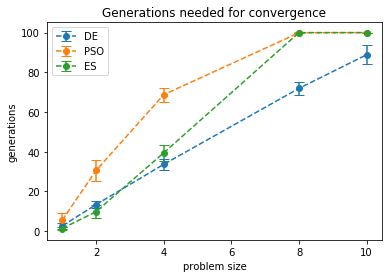

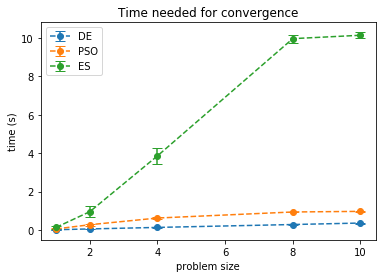

In [8]:
### Initialize some settings of the experiment
sphere = get_sphere()
subLs = [1, 2, 4, 8, 10]
VTR = pow(10, -5)
# repeat each experiment N times
N = 15
pop_size = 100
max_generations = 100
# arguments for the DE
args_de = {"population_size": pop_size, "crossover_probability": 0.25,
                     "f_weight": 0.1}
args_pso = {"population_size": pop_size}
args_es = {"population_size": pop_size, "offspring_size": 7*pop_size}
### Create arrays to store all of the partial results for later plotting
times_de = np.zeros((len(subLs), N))
times_pso = np.zeros((len(subLs), N))
times_es = np.zeros((len(subLs), N))
evals_de = np.zeros((len(subLs), N))
evals_pso = np.zeros((len(subLs), N))
evals_es = np.zeros((len(subLs), N))
gens_de = np.zeros((len(subLs), N))
gens_pso = np.zeros((len(subLs), N))
gens_es = np.zeros((len(subLs), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
for idx, subL in enumerate(subLs):
    print("L {}".format(subL), end="\t")
    LB = -3
    UB = 2

    for exp in range(N):
        print(exp, end=" ")
        
        de = DE(sphere, subL, lower_bounds=LB, upper_bounds=UB, 
                goal_fitness=VTR, max_generations=max_generations, **args_de)
        start = time()
        while not de.has_converged():
            de.evolve()
        times_de[idx, exp] = time() - start
        evals_de[idx, exp] = de._evaluations
        gens_de[idx, exp] = de._generations
        
        pso = PSO(sphere, subL, lower_bounds=LB, upper_bounds=UB,
                 goal_fitness=VTR, max_generations=max_generations, **args_pso)
        start = time()
        while not pso.has_converged():
            pso.evolve()
        times_pso[idx, exp] = time() - start
        evals_pso[idx, exp] = pso._evaluations
        gens_pso[idx, exp] = pso._generations
        
        es = ES(sphere, subL, lower_bounds=LB, upper_bounds=UB,
               goal_fitness=VTR, max_generations=max_generations, **args_es)
        start = time()
        while not es.has_converged():
            es.evolve()
        times_es[idx, exp] = time() - start
        evals_es[idx, exp] = es._evaluations
        gens_es[idx, exp] = es._generations
    print()

                
plt.figure(1)
plot_means_errs(subLs, gens_de)
plot_means_errs(subLs, gens_pso)
plot_means_errs(subLs, gens_es)
plt.title("Generations needed for convergence")
plt.xlabel("problem size")
plt.ylabel("generations")
plt.legend(["DE", "PSO", "ES"])

plt.figure(2)
plot_means_errs(subLs, evals_de)
plot_means_errs(subLs, evals_pso)
plot_means_errs(subLs, evals_es)
plt.title("Evaluations needed for convergence")
plt.xlabel("problem size")
plt.ylabel("evaluations")
plt.legend(["DE", "PSO", "ES"])

plt.figure(3)
plot_means_errs(subLs, times_de)
plot_means_errs(subLs, times_pso)
plot_means_errs(subLs, times_es)
plt.title("Time needed for convergence")
plt.xlabel("problem size")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO", "ES"])

plt.show()

# DE Compare normal BBO with CC BBO and CC GBO for sphere
Species of length 2, increasing number of functions

K 1
	0 1 2 3 4 5 6 7 8 9 
K 2
	0 1 2 3 4 5 6 7 8 9 
K 3
	0 1 2 3 4 5 6 7 8 9 
K 4
	0 1 2 3 4 5 6 7 8 9 
K 5
	0 1 2 3 4 5 6 7 8 9 
K 6
	0 1 2 3 4 5 6 7 8 9 ### Dropping standard DE ###

K 7
	0 1 2 3 4 5 6 7 8 9 
K 8
	0 1 2 3 4 5 6 7 8 9 
K 9
	0 1 2 3 4 5 6 7 8 9 
K 10
	0 1 2 3 4 5 6 7 8 9 


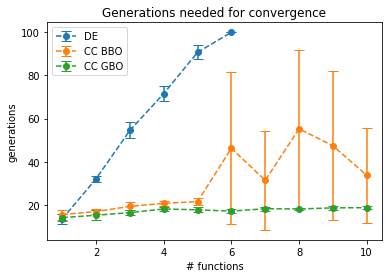

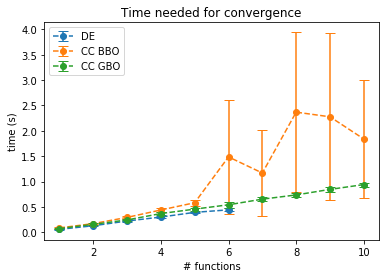

In [19]:
### Initialize some settings of the experiment
sphere = get_sphere()
subL = 2
VTR = pow(10, -5)
# repeat each experiment N times
N = 10
# number of functions is increasing
Kmax = 10
Ks = list(range(1, Kmax+1))
pop_size = 100
max_generations = 100
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.25,
                     "f_weight": 0.1}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        if success_idx == idx:
            de = DE(sphere, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = sphere,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

## Repeat experiment above
species of length 1

decrease max generations to see if the GBO beats BBO (quickly enough)

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 3
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 5
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 6
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 7
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping standard DE ###

K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 9
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 11
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 12
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 13
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 14
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 15
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 16
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 17
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 18
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 19
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 20
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 


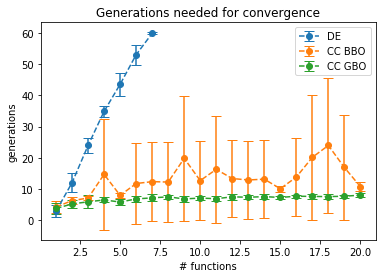

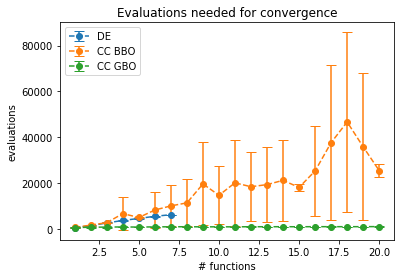

In [21]:
### Initialize some settings of the experiment
sphere = get_sphere()
subL = 1
VTR = pow(10, -5)
# repeat each experiment N times
N = 15
# number of functions is increasing
Kmax = 20
Ks = list(range(1, Kmax+1))
pop_size = 100
max_generations = 60
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.25,
                     "f_weight": 0.1}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        if success_idx == idx:
            de = DE(sphere, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = sphere,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

## Repeat experiments above
Decrease maximum generations even more

Increment the number of functions in a different way

In [22]:
### Initialize some settings of the experiment
sphere = get_sphere()
subL = 1
VTR = pow(10, -5)
# repeat each experiment N times
N = 15
# number of functions is increasing
Ks = [1, 2, 4, 8, 10, 20, 40, 80, 100, 200]
pop_size = 100
max_generations = 40
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.25,
                     "f_weight": 0.1}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        if success_idx == idx:
            de = DE(sphere, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = sphere,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping standard DE ###

K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 20
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 40
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 80
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 100
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 200
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 


# PSO Compare normal BBO with CC BBO and CC GBO for sphere
Species of length 1, increasing number of functions

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 3
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 5
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 6
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 7
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping standard PSO ###

K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 9
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 11
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 12
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 13
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping BBO ###

K 14
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 15
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 16
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 17
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 18
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 19
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 20
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 


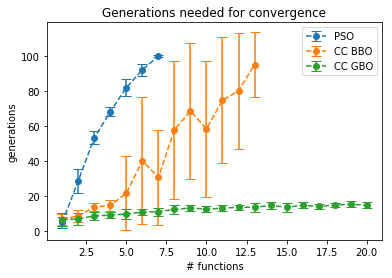

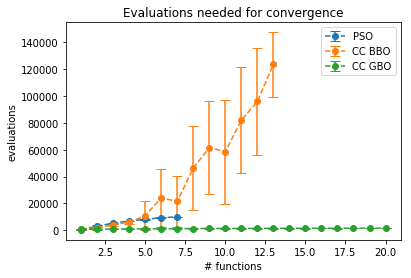

In [15]:
### Initialize some settings of the experiment
sphere = get_sphere()
subL = 1
VTR = pow(10, -5)
# repeat each experiment N times
N = 15
# number of functions is increasing
Kmax = 20
Ks = list(range(1, Kmax+1))
pop_size = 100
max_generations = 100
# arguments for the DE
args = {"population_size": pop_size}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [PSO]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        if success_idx == idx:
            pso = PSO(sphere, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not pso.has_converged():
                pso.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = pso._evaluations
            gens[idx, exp] = pso._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = sphere,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard PSO ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
plot_means_errs(Ks[:si], gens[:si])
plot_means_errs(Ks[:sib], gens_bbo[:sib])
plot_means_errs(Ks[:sig], gens_gbo[:sig])
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.figure(2)
plot_means_errs(Ks[:si], evals[:si])
plot_means_errs(Ks[:sib], evals_bbo[:sib])
plot_means_errs(Ks[:sig], evals_gbo[:sig])
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.figure(3)
plot_means_errs(Ks[:si], times[:si])
plot_means_errs(Ks[:sib], times_bbo[:sib])
plot_means_errs(Ks[:sig], times_gbo[:sig])
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.show()

# DE Compare normal BBO with CC BBO and CC GBO for rosenbrock
species of length 2
population size 200
max generations 100

## Try to find DE settings that work for rosenbrock

In [158]:
func = get_rosenbrock()
for _ in range(10):
    de = DE(func, 2, lower_bounds=-3, upper_bounds=2, 
                    goal_fitness=pow(10, -4), 
                    population_size=200, max_generations=100,
                    crossover_probability=0.33, f_weight=0.05)
    while not de.has_converged():
        de.evolve()
    print(de._generations)
    print(de.get_best_fitness(1))
    print(de.get_best_genotypes(1))

40
[8.19873863e-05]
[[0.99101235 0.98221545]]
100
[0.00017449]
[[0.98680351 0.97372228]]
22
[7.8520208e-05]
[[1.00687747 1.01324349]]
20
[9.31022724e-05]
[[1.00961572 1.01940391]]
38
[7.10349551e-05]
[[0.99284931 0.98619587]]
24
[4.07299488e-05]
[[0.99745873 0.9943385 ]]
32
[1.44726192e-05]
[[1.00169085 1.00304376]]
34
[3.62345538e-05]
[[0.99469912 0.98914112]]
34
[8.90553507e-05]
[[1.00907894 1.01849777]]
35
[6.74543886e-05]
[[0.99274359 0.98592453]]


K 1
	0 1 2 3 4 5 6 7 8 9 
K 2
	0 1 2 3 4 5 6 7 8 9 ### Dropping standard DE ###

K 3
	0 1 2 3 4 5 6 7 8 9 
K 4
	0 1 2 3 4 5 6 7 8 9 
K 5
	0 1 2 3 4 5 6 7 8 9 
K 6
	0 1 2 3 4 5 6 7 8 9 
K 7
	0 1 2 3 4 5 6 7 8 9 ### Dropping BBO ###

K 8
	0 1 2 3 4 5 6 7 8 9 
K 9
	0 1 2 3 4 5 6 7 8 9 
K 10
	0 1 2 3 4 5 6 7 8 9 ### Dropping GBO ###

K 11
	0 1 2 3 4 5 6 7 8 9 
K 12
	0 1 2 3 4 5 6 7 8 9 
K 13
	0 1 2 3 4 5 6 7 8 9 
K 14
	0 1 2 3 4 5 6 7 8 9 
K 15
	0 1 2 3 4 5 6 7 8 9 
K 16
	0 1 2 3 4 5 6 7 8 9 
K 17
	0 1 2 3 4 5 6 7 8 9 
K 18
	0 1 2 3 4 5 6 7 8 9 
K 19
	0 1 2 3 4 5 6 7 8 9 
K 20
	0 1 2 3 4 5 6 7 8 9 


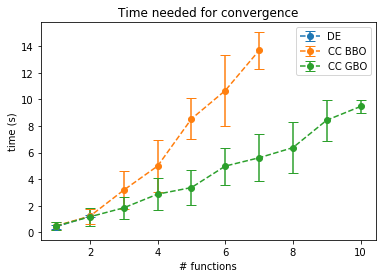

In [161]:
### Initialize some settings of the experiment
func = get_rosenbrock()
subL = 2
VTR = pow(10, -4)
# repeat each experiment N times
N = 10
# number of functions is increasing
Kmax = 20
Ks = list(range(1, Kmax+1))
pop_size = 200
max_generations = 100
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.33,
                     "f_weight": 0.05}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [func]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        F = lambda x: np.sum([func(x[i*subL:(i+1)*subL]) for i in range(K)])
        if success_idx == idx:
            de = DE(F, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = F,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

## Repeat this experiment
Smaller Ks

Bigger population

K 1
	0 1 2 3 4 5 6 7 8 9 
K 2
	0 1 2 3 4 5 6 7 8 9 ### Dropping standard DE ###

K 3
	0 1 2 3 4 5 6 7 8 9 
K 4
	0 1 2 3 4 5 6 7 8 9 
K 5
	0 1 2 3 4 5 6 7 8 9 
K 6
	0 1 2 3 4 5 6 7 8 9 
K 7
	0 1 2 3 4 5 6 7 8 9 
K 8
	0 1 2 3 4 5 6 7 8 9 
K 9
	0 1 2 3 4 5 6 7 8 9 
K 10
	0 1 2 3 4 5 6 7 8 9 


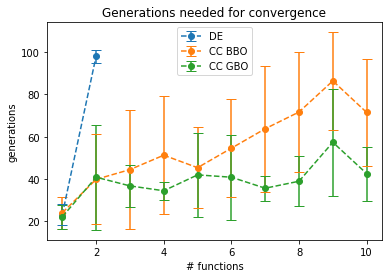

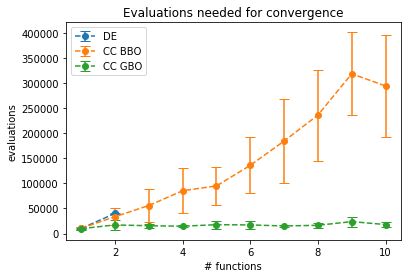

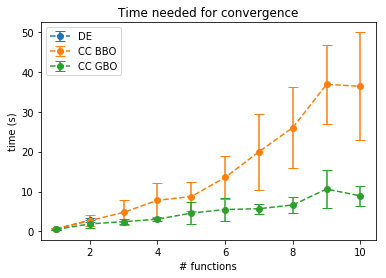

In [162]:
### Initialize some settings of the experiment
func = get_rosenbrock()
subL = 2
VTR = pow(10, -4)
# repeat each experiment N times
N = 10
# number of functions is increasing
Kmax = 10
Ks = list(range(1, Kmax+1))
pop_size = 400
max_generations = 100
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.33,
                     "f_weight": 0.05}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [func]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        F = lambda x: np.sum([func(x[i*subL:(i+1)*subL]) for i in range(K)])
        if success_idx == idx:
            de = DE(F, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = F,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

# PSO find settings for Rosenbrock
species of length 2
population size 500
max generations 100

In [10]:
func = get_rosenbrock()
for _ in range(10):
    pso = PSO(func, 2, lower_bounds=-1, upper_bounds=2, 
                    goal_fitness=pow(10, -4), 
                    population_size=500, max_generations=100, topology=PSOTopologies.LBEST)
    while not pso.has_converged():
        pso.evolve()
    print(pso._generations)
    print(pso.get_best_fitness(1))
    print(pso.get_best_genotypes(1))

28
[7.28157281e-05]
[array([0.99151168, 0.98318282])]
65
[3.43232777e-06]
[array([1.00003412, 1.00025347])]
59
[4.31684055e-05]
[array([0.99678951, 0.99301608])]
81
[4.34467134e-05]
[array([1.00472318, 1.00992843])]
67
[3.45034624e-05]
[array([1.00227003, 1.00508698])]
69
[5.5552935e-05]
[array([1.00526894, 1.01003847])]
100
[0.00018388]
[array([1.01333812, 1.02660973])]
77
[7.23005893e-06]
[array([0.99796525, 0.99575885])]
69
[6.21993642e-05]
[array([0.99212709, 0.98426962])]
46
[6.26993575e-05]
[array([1.00790852, 1.01584028])]


# PSO compare standard with CCBBO and CCGBO for Rosenbrock

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping standard PSO ###

K 3
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping BBO ###

K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ### Dropping GBO ###

K 5
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 6
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 7
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 9
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 
K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 


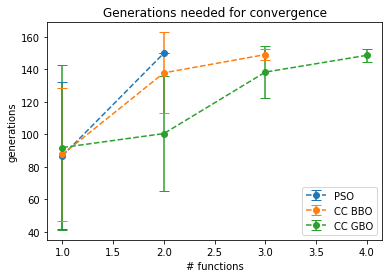

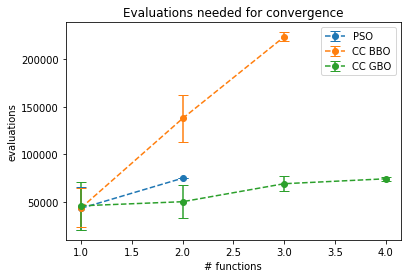

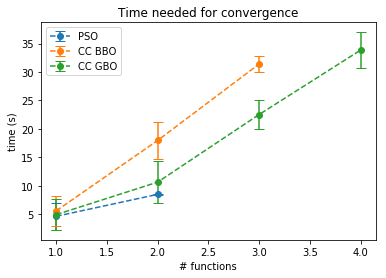

In [15]:
### Initialize some settings of the experiment
func = get_rosenbrock()
subL = 2
VTR = pow(10, -4)
# repeat each experiment N times
N = 15
# number of functions is increasing
Kmax = 10
Ks = list(range(1, Kmax+1))
pop_size = 500
max_generations = 150
# arguments for the DE
args = {"population_size": pop_size}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [func]*K
    LB = [-1]*K*subL
    UB = [2]*K*subL
    gas = [PSO]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        F = lambda x: np.sum([func(x[i*subL:(i+1)*subL]) for i in range(K)])
        if success_idx == idx:
            pso = PSO(F, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not pso.has_converged():
                pso.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = pso._evaluations
            gens[idx, exp] = pso._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = F,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard PSO ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
plot_means_errs(Ks[:si], gens[:si])
plot_means_errs(Ks[:sib], gens_bbo[:sib])
plot_means_errs(Ks[:sig], gens_gbo[:sig])
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.figure(2)
plot_means_errs(Ks[:si], evals[:si])
plot_means_errs(Ks[:sib], evals_bbo[:sib])
plot_means_errs(Ks[:sig], evals_gbo[:sig])
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.figure(3)
plot_means_errs(Ks[:si], times[:si])
plot_means_errs(Ks[:sib], times_bbo[:sib])
plot_means_errs(Ks[:sig], times_gbo[:sig])
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["PSO", "CC BBO", "CC GBO"])

plt.show()

# DE Compare BBO with CCBBO and CCGBO for the SoREB

Figure out settings for which I converge

In [4]:
func = FunctionFactory.get_rotated_ellipsoid()
for _ in range(10):
    de = DE(func, 2, lower_bounds=-3, upper_bounds=2, 
                    goal_fitness=pow(10, -3), 
                    population_size=200, max_generations=100,
                    crossover_probability=0.33, f_weight=0.05)
    while not de.has_converged():
        de.evolve()
    print(de._generations)
    print(de.get_best_fitness(1))
    print(de.get_best_genotypes(1))

24
[0.00035564]
[[-1.84875794e-02  3.72180759e-06]]
26
[0.00077097]
[[-2.10737055e-02 -1.80795088e-05]]
22
[0.0003009]
[[4.07515491e-03 1.68611350e-05]]
27
[0.00046634]
[[-1.00922059e-03 -2.15713328e-05]]
29
[0.00024325]
[[-5.08460878e-03 -1.47443883e-05]]
26
[4.67779982e-05]
[[ 2.17711425e-04 -6.83597835e-06]]
23
[0.00059689]
[[-1.39125761e-02 -2.00830507e-05]]
24
[0.00022055]
[[8.61356753e-03 1.20976058e-05]]
23
[0.00062075]
[[-2.08200180e-02 -1.36847707e-05]]
27
[0.0002603]
[[-1.33072867e-02 -9.12227888e-06]]


Species size 2

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ### Dropping standard DE ###

K 3
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ### Dropping BBO ###

K 5
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 6
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ### Dropping GBO ###

K 7
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 9
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


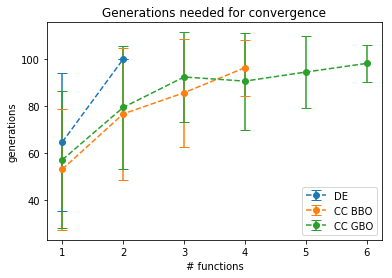

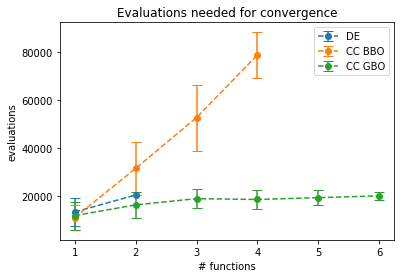

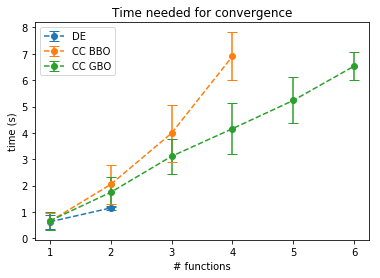

In [2]:
### Initialize some settings of the experiment
func = FunctionFactory.get_rotated_ellipsoid()
subL = 2
VTR = pow(10, -3)
# repeat each experiment N times
N = 20
# number of functions is increasing
Kmax = 10
Ks = list(range(1, Kmax+1))
pop_size = 200
max_generations = 100
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.33,
                     "f_weight": 0.05}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [func]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        F = FunctionFactory.get_soreb(k=subL)
        if success_idx == idx:
            de = DE(F, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = F,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

## Same experiment

slightly extend maximum number of generations and population size to look for the same "damped" growth on the number of generations for the CC GBO

also increase number of repetitions to get more accurate representations of the values

K 1
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 2
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 ### Dropping standard DE ###

K 3
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 4
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 5
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 6
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 7
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 8
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
K 9
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 ### Dropping BBO ###

K 10
	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 


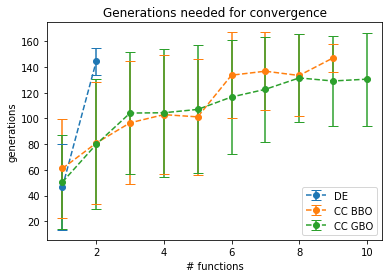

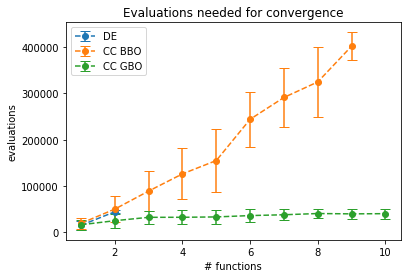

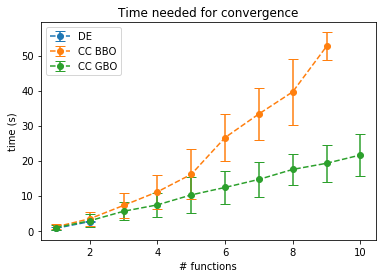

In [13]:
### Initialize some settings of the experiment
func = FunctionFactory.get_rotated_ellipsoid()
subL = 2
VTR = pow(10, -3)
# repeat each experiment N times
N = 30
# number of functions is increasing
Kmax = 10
Ks = list(range(1, Kmax+1))
pop_size = 300
max_generations = 150
# arguments for the DE
args = {"population_size": pop_size, "crossover_probability": 0.33,
                     "f_weight": 0.05}
### Create arrays to store all of the partial results for later plotting
times = np.zeros((len(Ks), N))
times_gbo = np.zeros((len(Ks), N))
times_bbo = np.zeros((len(Ks), N))
evals = np.zeros((len(Ks), N))
evals_gbo = np.zeros((len(Ks), N))
evals_bbo = np.zeros((len(Ks), N))
gens = np.zeros((len(Ks), N))
gens_gbo = np.zeros((len(Ks), N))
gens_bbo = np.zeros((len(Ks), N))
# to save some time, check up until what point the algorithms have been solving the problems,
# so that we don't run the harder experiments if they failed the easier ones
# also only plot up until the first big failure
success_idx = 0
success_idx_gbo = 0
success_idx_bbo = 0
for idx, K in enumerate(Ks):
    print("K {}".format(K))
    ### Input for the GBO and BBO classes
    functions = [func]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    ga_arguments = [args]*K

    print("\t", end="")
    for exp in range(N):
        print(exp, end=" ")
        ### normal black box optimization
        # only run if it has been keeping up
        F = FunctionFactory.get_soreb(k=subL)
        if success_idx == idx:
            de = DE(F, K*subL, lower_bounds=LB[0], upper_bounds=UB[0], 
                    goal_fitness=VTR, max_generations=max_generations, **args)
            start = time()
            while not de.has_converged():
                de.evolve()
            times[idx, exp] = time() - start
            evals[idx, exp] = de._evaluations
            gens[idx, exp] = de._generations
        ### cooperative coevolution with gray box optimization
        # only run if it has been keeping up
        if success_idx_gbo == idx:
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times_gbo[idx, exp] = time() - start
            evals_gbo[idx, exp] = gbo.get_evaluations()
            gens_gbo[idx, exp] = gbo._generations
        ### cooperative coevolution with black box optimization
        # only run if it has been keeping up
        if success_idx_bbo == idx:
            bbo = BlackBoxOptimizer(function = F,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = ga_arguments,
                              max_generations = max_generations,
                              goal_fitness = VTR)
            start = time()
            while not bbo.has_converged():
                bbo.evolve()
            times_bbo[idx, exp] = time() - start
            evals_bbo[idx, exp] = bbo.get_evaluations()
            gens_bbo[idx, exp] = bbo._generations
            
    ### check which of the algorithms were able to keep up
    if success_idx == idx:
        # if the avg number of generations used was below 95% of the max,
        # run this algorithm in the next experiment
        if np.mean(gens[idx, :]) <= 0.95*max_generations:
            success_idx += 1
        else:
            print("### Dropping standard DE ###")
    if success_idx_gbo == idx:
        if np.mean(gens_gbo[idx, :]) <= 0.95*max_generations:
            success_idx_gbo += 1
        else:
            print("### Dropping GBO ###")
    if success_idx_bbo == idx:
        if np.mean(gens_bbo[idx, :]) <= 0.95*max_generations:
            success_idx_bbo += 1
        else:
            print("### Dropping BBO ###")
    print()

si = success_idx+1
sig = success_idx_gbo+1
sib = success_idx_bbo+1
                
plt.figure(1)
gens_means = np.mean(gens[:si], axis=-1)
gens_errs = np.std(gens[:si], axis=-1)
plt.errorbar(Ks[:si], gens_means, yerr=gens_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(gens_bbo[:sib], axis=-1)
gens_bbo_errs = np.std(gens_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
gens_gbo_means = np.mean(gens_gbo[:sig], axis=-1)
gens_gbo_errs = np.std(gens_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], gens_gbo_means, yerr=gens_gbo_errs, fmt="--o", capsize=5)
plt.title("Generations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("generations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(2)
evals_means = np.mean(evals[:si], axis=-1)
evals_errs = np.std(evals[:si], axis=-1)
plt.errorbar(Ks[:si], evals_means, yerr=evals_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evals_bbo[:sib], axis=-1)
evals_bbo_errs = np.std(evals_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
evals_gbo_means = np.mean(evals_gbo[:sig], axis=-1)
evals_gbo_errs = np.std(evals_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], evals_gbo_means, yerr=evals_gbo_errs, fmt="--o", capsize=5)
plt.title("Evaluations needed for convergence")
plt.xlabel("# functions")
plt.ylabel("evaluations")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.figure(3)
times_means = np.mean(times[:si], axis=-1)
times_errs = np.std(times[:si], axis=-1)
plt.errorbar(Ks[:si], times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo[:sib], axis=-1)
times_bbo_errs = np.std(times_bbo[:sib], axis=-1)
plt.errorbar(Ks[:sib], times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
times_gbo_means = np.mean(times_gbo[:sig], axis=-1)
times_gbo_errs = np.std(times_gbo[:sig], axis=-1)
plt.errorbar(Ks[:sig], times_gbo_means, yerr=times_gbo_errs, fmt="--o", capsize=5)
plt.title("Time needed for convergence")
plt.xlabel("# functions")
plt.ylabel("time (s)")
plt.legend(["DE", "CC BBO", "CC GBO"])

plt.show()

# PSO find settings for SoREB experiment

Don't even bother, super slow even for "big" numbers like population size 1000 and 200 generations

In [21]:
func = FunctionFactory.get_rotated_ellipsoid()
times = 0
for _ in range(10):
    pso = PSO(func, 2, lower_bounds=-1, upper_bounds=2, 
                    goal_fitness=pow(10, -3), 
                    population_size=1000, max_generations=200)
    start = time()
    while not pso.has_converged():
        pso.evolve()
    times += time() - start
    print(pso._generations)
    print(pso.get_best_fitness(1))
    print(pso.get_best_genotypes(1))
print("Avg run of {}s".format(round(times/10, 2)))

200
[0.05744709]
[array([ 0.00726947, -0.00023957])]
200
[0.03867834]
[array([-1.79867459e-01,  7.95363988e-05])]
200
[0.00826097]
[array([ 9.05419239e-02, -7.94522885e-06])]
200
[0.02222987]
[array([ 1.48337603e-01, -1.50275771e-05])]
200
[0.01798552]
[array([-0.04333406, -0.00012692])]
200
[0.00763373]
[array([-8.63797048e-03, -8.69431487e-05])]
200
[0.00261894]
[array([4.01964925e-02, 3.16730221e-05])]
200
[0.00518228]
[array([ 7.01655946e-02, -1.60955883e-05])]
200
[0.00856049]
[array([ 7.67579673e-02, -5.16595472e-05])]
200
[0.05517052]
[array([-0.05409192,  0.00022857])]
Avg run of 21.51s


# From here onwards, I don't really know what to do with this...
# Will be deleted soon, but I might want to copy & pasta some of the code below, before I do that

## (B) Sphere with 5 inputs, increase number of functions

### Differential Evolution, PSO and Evolution Strategies

<class 'differential_evolution.DifferentialEvolution'>
K 1
K 2
K 3
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
K 1
K 2
K 3
<class 'evolution_strategies.EvolutionStrategies'>
K 1
K 2
K 3


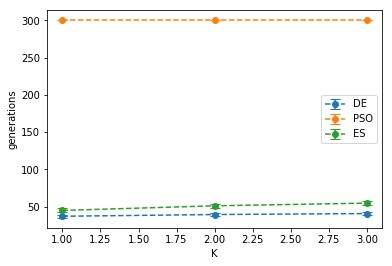

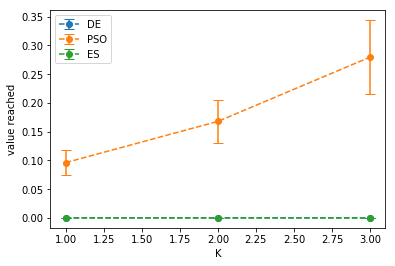

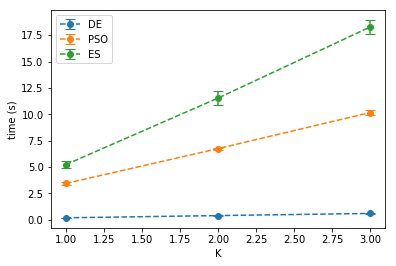

In [3]:
sphere = get_sphere()
subL = 5
VTR = pow(10, -4)
# repeat each experiment N times
N = 10
# vary number of functions up to kmax
Kmax = 3
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO, ES]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS},
    {"population_size": 100, "offspring_size": 700}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((Kmax, N))
    generations = np.zeros((Kmax, N))
    values_reached = np.zeros((Kmax, N))
    for K in Ks:
        print("K {}".format(K))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[K-1, exp] = time() - start
            generations[K-1, exp] = gbo._generations
            values_reached[K-1, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(Ks, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(Ks, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(Ks, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("K")
plt.ylabel("generations")
plt.legend(["DE", "PSO", "ES"])

plt.figure(2)
plt.xlabel("K")
plt.ylabel("value reached")
plt.legend(["DE", "PSO", "ES"])

plt.figure(3)
plt.xlabel("K")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO", "ES"])

plt.show()

### Differential Evolution and Particle Swarm Optimization

<class 'differential_evolution.DifferentialEvolution'>
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
K 20
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
K 1
K 2
K 3
K 4
K 5
K 6
K 7
K 8
K 9
K 10
K 11
K 12
K 13
K 14
K 15
K 16
K 17
K 18
K 19
K 20


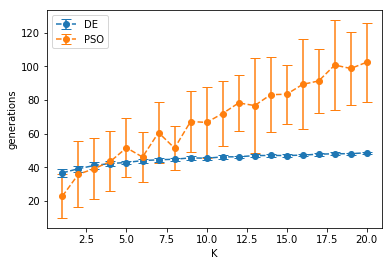

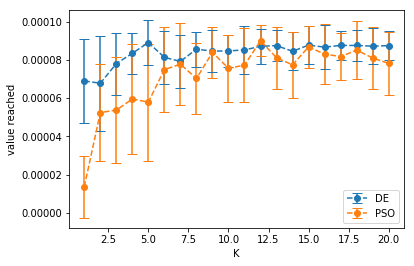

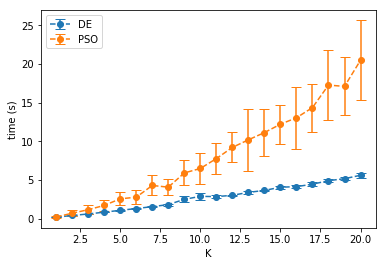

In [29]:
sphere = get_sphere()
subL = 5
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# vary number of functions up to kmax
Kmax = 20
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((Kmax, N))
    generations = np.zeros((Kmax, N))
    values_reached = np.zeros((Kmax, N))
    for K in Ks:
        print("K {}".format(K))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[K-1, exp] = time() - start
            generations[K-1, exp] = gbo._generations
            values_reached[K-1, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(Ks, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(Ks, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(Ks, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("K")
plt.ylabel("generations")
plt.legend(["DE", "PSO"])

plt.figure(2)
plt.xlabel("K")
plt.ylabel("value reached")
plt.legend(["DE", "PSO"])

plt.figure(3)
plt.xlabel("K")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO"])

plt.show()

## (C) 5 sphere functions, increase input size

###  Differential Evolution, Particle Swarm Optimization

<class 'differential_evolution.DifferentialEvolution'>
subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64
<class 'particle_swarm_optimization.ParticleSwarmOptimization'>
subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64


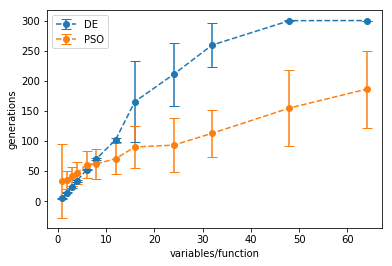

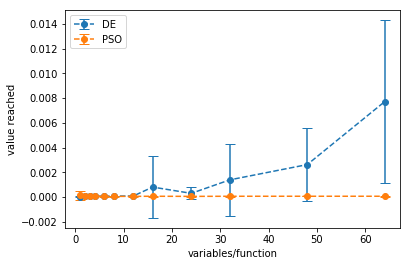

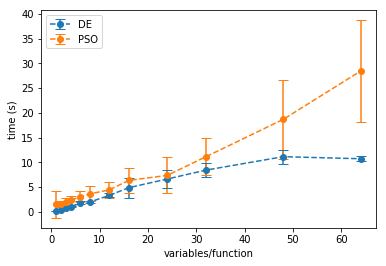

In [31]:
sphere = get_sphere()
subLs = [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# number of functions is fixed
K = 5
Ks = list(range(1, Kmax+1))

GAs = [DE, PSO]
ga_arguments = [
    {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1},
    {"population_size": 100, "interaction": PSOInteractions.FIPS}
]
for GA, args in zip(GAs, ga_arguments):
    print(GA)
    # save the results, each row for a different K
    times = np.zeros((len(subLs), N))
    generations = np.zeros((len(subLs), N))
    values_reached = np.zeros((len(subLs), N))
    for idx, subL in enumerate(subLs):
        print("subL {}".format(subL))
        functions = [sphere]*K
        LB = [-3]*K*subL
        UB = [2]*K*subL
        gas = [GA]*K
        train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
        arguments = [args]*K

        for exp in range(N):
            gbo = GrayBoxOptimizer(functions = functions,
                              input_spaces = input_spaces,
                              train_partition = train_partition,
                              lower_bounds = LB, upper_bounds = UB,
                              genetic_algorithms = gas,
                              genetic_algorithm_arguments = arguments,
                              max_generations = 300,
                              goal_fitness = VTR)
            start = time()
            while not gbo.has_converged():
                gbo.evolve()
            times[idx, exp] = time() - start
            generations[idx, exp] = gbo._generations
            values_reached[idx, exp] = gbo.get_elite_fitness()

    plt.figure(1)
    generations_means = np.mean(generations, axis=-1)
    generations_errs = np.std(generations, axis=-1)
    plt.errorbar(subLs, generations_means, yerr=generations_errs, fmt="--o", capsize=5)

    plt.figure(2)
    vals_means = np.mean(values_reached, axis=-1)
    vals_errs = np.std(values_reached, axis=-1)
    plt.errorbar(subLs, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
    
    plt.figure(3)
    times_means = np.mean(times, axis=-1)
    times_errs = np.std(times, axis=-1)
    plt.errorbar(subLs, times_means, yerr=times_errs, fmt="--o", capsize=5)
    
plt.figure(1)
plt.xlabel("variables/function")
plt.ylabel("generations")
plt.legend(["DE", "PSO"])

plt.figure(2)
plt.xlabel("variables/function")
plt.ylabel("value reached")
plt.legend(["DE", "PSO"])

plt.figure(3)
plt.xlabel("variables/function")
plt.ylabel("time (s)")
plt.legend(["DE", "PSO"])

plt.show()

### DE, GBO vs BBO

subL 1
subL 2
subL 3
subL 4
subL 6
subL 8
subL 12
subL 16
subL 24
subL 32
subL 48
subL 64


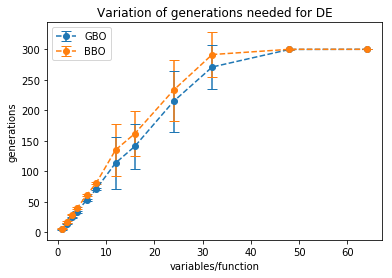

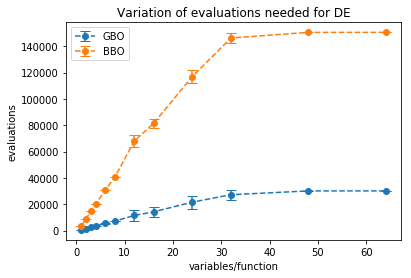

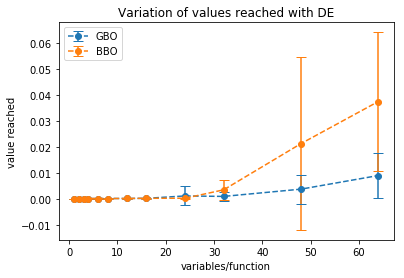

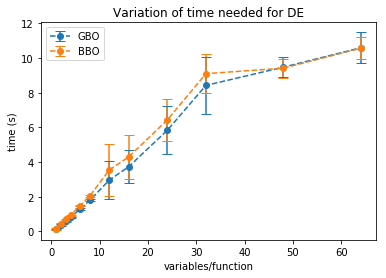

In [8]:
sphere = get_sphere()
subLs = [1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64]
VTR = pow(10, -4)
# repeat each experiment N times
N = 20
# number of functions is fixed
K = 5
Ks = list(range(1, Kmax+1))

args = {"population_size": 100, "crossover_probability": 0.25,
                     "f_weight": 0.1}
# save the results, each row for a different L
times = np.zeros((len(subLs), N))
times_bbo = np.zeros((len(subLs), N))
evaluations = np.zeros((len(subLs), N))
evaluations_bbo = np.zeros((len(subLs), N))
generations = np.zeros((len(subLs), N))
generations_bbo = np.zeros((len(subLs), N))
values_reached = np.zeros((len(subLs), N))
values_reached_bbo = np.zeros((len(subLs), N))
for idx, subL in enumerate(subLs):
    print("subL {}".format(subL))
    functions = [sphere]*K
    LB = [-3]*K*subL
    UB = [2]*K*subL
    gas = [DE]*K
    train_partition = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    input_spaces = [list(range(i*subL, (i+1)*subL)) for i in range(K)]
    arguments = [args]*K

    for exp in range(N):
        gbo = GrayBoxOptimizer(functions = functions,
                          input_spaces = input_spaces,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = gas,
                          genetic_algorithm_arguments = arguments,
                          max_generations = 300,
                          goal_fitness = VTR)
        start = time()
        while not gbo.has_converged():
            gbo.evolve()
        times[idx, exp] = time() - start
        evaluations[idx, exp] = gbo.get_evaluations()
        generations[idx, exp] = gbo._generations
        values_reached[idx, exp] = gbo.get_elite_fitness()
        
        bbo = BlackBoxOptimizer(function = sphere,
                          train_partition = train_partition,
                          lower_bounds = LB, upper_bounds = UB,
                          genetic_algorithms = gas,
                          genetic_algorithm_arguments = arguments,
                          max_generations = 300,
                          goal_fitness = VTR)
        start = time()
        while not bbo.has_converged():
            bbo.evolve()
        times_bbo[idx, exp] = time() - start
        evaluations_bbo[idx, exp] = bbo.get_evaluations()
        generations_bbo[idx, exp] = bbo._generations
        values_reached_bbo[idx, exp] = bbo.get_elite_fitness()

plt.figure(1)
generations_means = np.mean(generations, axis=-1)
generations_errs = np.std(generations, axis=-1)
plt.errorbar(subLs, generations_means, yerr=generations_errs, fmt="--o", capsize=5)
gens_bbo_means = np.mean(generations_bbo, axis=-1)
gens_bbo_errs = np.std(generations, axis=-1)
plt.errorbar(subLs, gens_bbo_means, yerr=gens_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of generations needed for DE")
plt.xlabel("variables/function")
plt.ylabel("generations")
plt.legend(["GBO", "BBO"])

plt.figure(2)
evaluations_means = np.mean(evaluations, axis=-1)
evaluations_errs = np.std(evaluations, axis=-1)
plt.errorbar(subLs, evaluations_means, yerr=evaluations_errs, fmt="--o", capsize=5)
evals_bbo_means = np.mean(evaluations_bbo, axis=-1)
evals_bbo_errs = np.std(evaluations, axis=-1)
plt.errorbar(subLs, evals_bbo_means, yerr=evals_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of evaluations needed for DE")
plt.xlabel("variables/function")
plt.ylabel("evaluations")
plt.legend(["GBO", "BBO"])

plt.figure(3)
vals_means = np.mean(values_reached, axis=-1)
vals_errs = np.std(values_reached, axis=-1)
plt.errorbar(subLs, vals_means, yerr=vals_errs, fmt="--o", capsize=5)
vals_bbo_means = np.mean(values_reached_bbo, axis=-1)
vals_bbo_errs = np.std(values_reached_bbo, axis=-1)
plt.errorbar(subLs, vals_bbo_means, yerr=vals_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of values reached with DE")
plt.xlabel("variables/function")
plt.ylabel("value reached")
plt.legend(["GBO", "BBO"])

plt.figure(4)
times_means = np.mean(times, axis=-1)
times_errs = np.std(times, axis=-1)
plt.errorbar(subLs, times_means, yerr=times_errs, fmt="--o", capsize=5)
times_bbo_means = np.mean(times_bbo, axis=-1)
times_bbo_errs = np.std(times_bbo, axis=-1)
plt.errorbar(subLs, times_bbo_means, yerr=times_bbo_errs, fmt="--o", capsize=5)
plt.title("Variation of time needed for DE")
plt.xlabel("variables/function")
plt.ylabel("time (s)")
plt.legend(["GBO", "BBO"])

plt.show()